# Computer vision problems

Vorige week heb je geleerd hoe je gebruik kan maken van convolutionele lagen om op een efficiente manier classificatie problemen uit te voeren op beelden.
Echter zijn er naast classificatie problemen ook andere zaken die je kan doen in het domein van computer visie.

De meest voorkomende hiervan zijn:
* Object Localization
* Object Detection 
* Image Segmentation

Modellen voor deze oplossingen kunnen zelf gemaakt worden (een oefening hierop gaan we uitvoeren bij image segmentation).
Echter zijn ze vaak heel complex waardoor het vaak eenvoudiger en sneller is om bestaande oplossingen/modellen hiervoor te gebruiken.
Gelukkig zijn er hiervoor een hele reeks te vinden op tensorflow hub.

## Object Localization

Hierbij wordt de regio aangeduid van elke klasse waarin een object gezien wordt.
Dit houdt echter in dat er slechts maar 1 object van elke klasse kan gedetecteerd worden.

Dit kan eenvoudig gedaan worden door het classificatieprobleem aan te passen waarbij je ipv 1 neuron te gebruiken er 4 gebruikt (of 5).
Deze 4 of 5 neurons kunnen dan bijvoorbeeld staan voor:
* xmin van de bounding box
* ymin van de bounding box
* width van de bouding box
* height van de bouding box
* optionele zekerheid van de classe/bounding box

## Object Detection

Object detectie is een uitbreiding van object localization waarbij geprobeerd wordt alle objecten in een figuur te detecteren en classificeren.
Er zijn doorheen de jaren een hele reeks neurale netwerken getrained voor verschillende inputs/classes/snelheden/... 
Een overzicht hiervan kan je vinden op [deze link](https://tfhub.dev/tensorflow/collections/object_detection/1)

**Oefening**

Voer de volgende stappen uit:
* Kies een model uit de lijst van tensorflow hub
* Bekijk de colab notebook en bestudeer de code uit de verschillende cellen
* Haal er de minimum code uit om het neuraal netwerk te downloaden en te gebruiken
* Kies een figuur op het internet en voer er object detectie op uit met je zelfgekozen neuraal netwerk
* Maak een plot van de input figuur met de gedetecteerde objecten erop getekend. Let op bij het weergeven van de namen van de classen. Dit lukt niet altijd zoals in de notebook op tensorflow. (Tip: kijk naar de notebook op tensorflow en de democode uit lesweek 1)

In [30]:
labels = []

#with open('ImageNetLabels.txt') as f:
#    lines = f.readlines()

#    for line in lines:
#        labels.append(line.replace("\n", ""))

labels = ['person','bicycle','car','motorcycle','airplane','bus','train','truck','boat','traffic light','fire hydrant','stop sign','parking meter','bench','bird','cat','dog','horse','sheep','cow','elephant','bear','zebra','giraffe','backpack','umbrella','handbag','tie','suitcase','frisbee','skis','snowboard','sports ball','kite','baseball bat','baseball glove','skateboard','surfboard','tennis racket','bottle','wine glass','cup','fork','knife','spoon','bowl','banana','apple','sandwich','orange','broccoli','carrot','hot dog','pizza','donut','cake','chair','couch','potted plant','bed','dining table','toilet','tv','laptop','mouse','remote','keyboard','cell phone','microwave','oven','toaster','sink','refrigerator','book','clock','vase','scissors','teddy bear','hair drier','toothbrush']

In [1]:
# load an object detection model from tensorflow hub
# load the same image as in the previous example
# make the prediction for the image
# show image and predicted objects

import tensorflow as tf
import tensorflow_hub as hub
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

(835, 1385, 3)


C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_22820\2950565483.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img  = imageio.imread(image_path)


In [5]:
image_path = "image.png"
img  = imageio.imread(image_path)
print(img.shape)
# een extra dimensie toevoegen omdat tensorflow een rij van figuurtjes verwacht en geen los figuurtje
img = tf.cast(tf.expand_dims(img, 0), tf.uint8)

model_handle = 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1'
hub_model = hub.load(model_handle)

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_22820\571192832.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img  = imageio.imread(image_path)


(835, 1385, 3)


dict_keys(['raw_detection_scores', 'detection_anchor_indices', 'raw_detection_boxes', 'num_detections', 'detection_boxes', 'detection_scores', 'detection_classes', 'detection_multiclass_scores'])


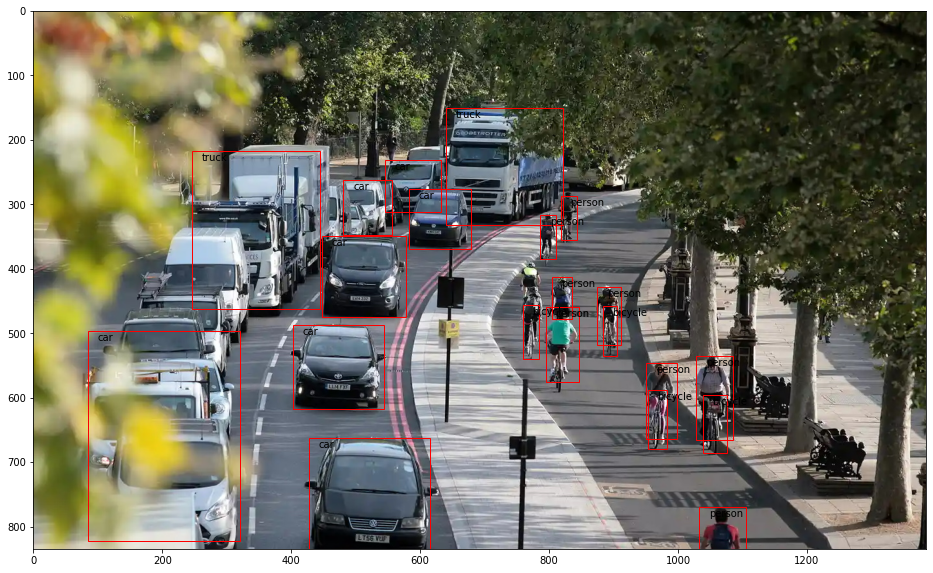

In [32]:
results = hub_model(img)

print(results.keys())

#terug eerste dimensie verwijderen
boxes = np.squeeze(results["detection_boxes"])
classes = np.squeeze(results["detection_classes"])
scores = np.squeeze(results["detection_scores"])
        
plt.figure(figsize=(16,16))
plt.imshow(img[0])

_, im_height, im_width, _ = img.shape
for idx, box in enumerate(boxes):
    if scores[idx] > 0.6:
        ymin, xmin, ymax, xmax = box
        ymin, xmin, ymax, xmax = int(ymin * im_height), int(xmin * im_width), int(ymax * im_height), int(xmax * im_width)
        
        rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, edgecolor='r', facecolor='none')

        plt.gca().add_patch(rect)

        plt.text(xmin +15, ymin+15, labels[int(classes[idx])-1] + " " + str(int(scores[idx]*100)) + "%")

plt.show()

# Image segmentation

Een uitbreiding op object detectie is dat we gaan kijken voor elke pixel of groep pixels tot welke klasse het behoort.
Ook hiervoor bestaan er een reeks bestaande netwerken op tensorflow hub, zie [deze link](https://tfhub.dev/s?module-type=image-segmentation).

Let op dat het Mask R-CNN model hier niet tussen staat omdat het technisch gezien object detectie doet maar de resultaten kunnen ook gebruikt worden voor image segmentation.
Bekijk de notebook voor object detection met mask r-cnn en voer image segmentation uit met dezelfde figuur.

Let op dat ik bij het voorbereiden door een versieverschil een fout kreeg met de standaard reframe_box_masks_to_image_masks functie.
Indien je hier ook een fout mee krijgt kan je de onderstaande functie gebruiken. (Aanpassing staat in commentaar)

In [38]:
# copy from package and fixed?
def reframe_box_masks_to_image_masks(box_masks, boxes, image_height,
                                     image_width):
  """Transforms the box masks back to full image masks.

  Embeds masks in bounding boxes of larger masks whose shapes correspond to
  image shape.

  Args:
    box_masks: A tf.float32 tensor of size [num_masks, mask_height, mask_width].
    boxes: A tf.float32 tensor of size [num_masks, 4] containing the box
           corners. Row i contains [ymin, xmin, ymax, xmax] of the box
           corresponding to mask i. Note that the box corners are in
           normalized coordinates.
    image_height: Image height. The output mask will have the same height as
                  the image height.
    image_width: Image width. The output mask will have the same width as the
                 image width.

  Returns:
    A tf.float32 tensor of size [num_masks, image_height, image_width].
  """
  # TODO(rathodv): Make this a public function.
  def reframe_box_masks_to_image_masks_default():
    """The default function when there are more than 0 box masks."""
    def transform_boxes_relative_to_boxes(boxes, reference_boxes):
      boxes = tf.reshape(boxes, [-1, 2, 2])
      min_corner = tf.expand_dims(reference_boxes[:, 0:2], 1)
      max_corner = tf.expand_dims(reference_boxes[:, 2:4], 1)
      transformed_boxes = (boxes - min_corner) / (max_corner - min_corner)
      return tf.reshape(transformed_boxes, [-1, 4])

    box_masks_expanded = tf.expand_dims(box_masks, axis=3)
    num_boxes = tf.shape(box_masks_expanded)[0]
    unit_boxes = tf.concat(
        [tf.zeros([num_boxes, 2]), tf.ones([num_boxes, 2])], axis=1)
    reverse_boxes = transform_boxes_relative_to_boxes(unit_boxes, boxes)
    return tf.image.crop_and_resize(
        image=box_masks_expanded,
        boxes=reverse_boxes,
        box_indices=tf.range(num_boxes),    # dit heb ik aangepast (stond oorspronkelijk box_ind)
        crop_size=[image_height, image_width],
        extrapolation_value=0.0)
  image_masks = tf.cond(
      tf.shape(box_masks)[0] > 0,
      reframe_box_masks_to_image_masks_default,
      lambda: tf.zeros([0, image_height, image_width, 1], dtype=tf.float32))
  return tf.squeeze(image_masks, axis=3)


In [33]:
# load image segmentation model from tensorflow hub
# load the same image as in the previous example
# make the prediction for the image

model_handle = 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
hub_model = hub.load(model_handle)


C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_22820\3058134666.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


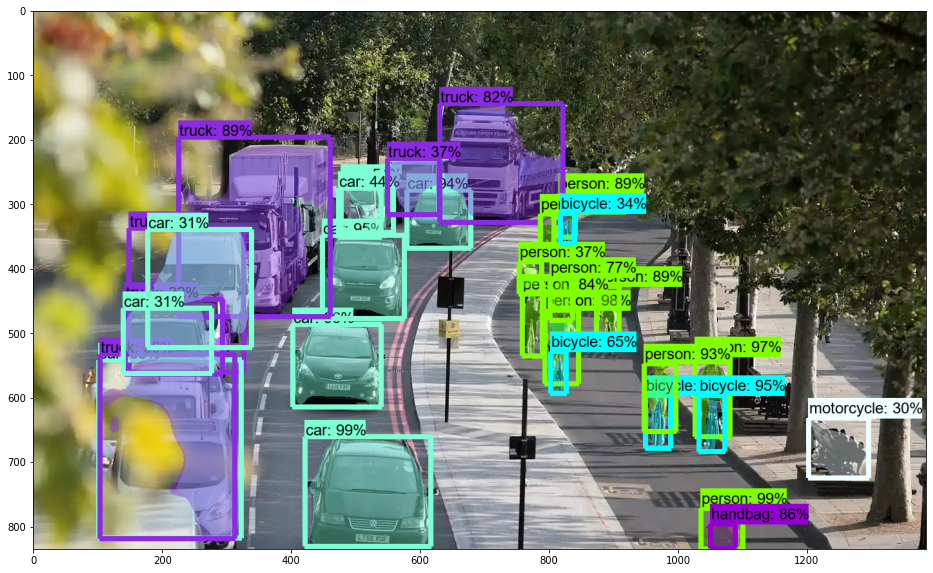

In [46]:
from unicodedata import category
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

results = hub_model(img)
result = {key:value.numpy() for key,value in results.items()}

# show original image and its mask
img_copy = img.numpy().copy()

category_index = {}
for idx, lbl in enumerate(labels):
    category_index[idx+1] = {"id": idx+1, "name":lbl}

masks = tf.convert_to_tensor(result['detection_masks'][0])
boxes = tf.convert_to_tensor(result['detection_boxes'][0])

detection_masks_reframed = reframe_box_masks_to_image_masks(masks, boxes, img.shape[1], img.shape[2])
detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5, tf.uint8)
result['detection_masks_reframed'] = detection_masks_reframed.numpy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      img_copy[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0]).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False,
      instance_masks=result.get('detection_masks_reframed', None),
      line_thickness=8)

plt.figure(figsize = (16,16))
plt.imshow(img_copy[0])
plt.show()

Natuurlijk is het ook mogelijk om dit soort netwerken zelf te maken. 
Als experiment gaan we op beelden de soort en ras van huisdieren gaan bepalen.
Hiervoor gaan we gebruik maken van [deze dataset](https://www.kaggle.com/datasets/devdgohil/the-oxfordiiit-pet-dataset).

Download in de cell hieronder de dataset en bekijk de files die gedownload zijn.

In [49]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/devdgohil/the-oxfordiiit-pet-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading the-oxfordiiit-pet-dataset.zip to .\the-oxfordiiit-pet-dataset


100%|██████████| 780M/780M [00:29<00:00, 27.5MB/s] 


Er zijn twee folders gedownload. 
De folder images bevat alle figuren in de dataset waarbij de naam van de file begint met de klasse waartoe het behoort.
De folder annotations is iets complexer en bevat segmentation masks voor elke figuur in de trimaps folder en extra metadata voor elke figuur in de xmls file.
Deze metadata bevat bijvoorbeeld informatie over de bounding boxes van de dieren in de figuren.
In dit deel gaan we enkel werken met de informatie uit de trimaps folder om het model te trainen.

In [50]:
input_dir = "the-oxfordiiit-pet-dataset/images/images"
target_dir = "the-oxfordiiit-pet-dataset/annotations/annotations/trimaps"

import os
input_img_paths = sorted([os.path.join(input_dir,fname) for fname in os.listdir(input_dir) if fname.endswith(".jpg")])
target_paths = sorted([os.path.join(target_dir,fname) for fname in os.listdir(target_dir) if fname.endswith(".png") and not fname.startswith(".")])

print("Num inputs: ", len(input_img_paths))
print("Num targets: ", len(target_paths))

Num inputs:  7390
Num targets:  7390


In [51]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_22820\3854489299.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


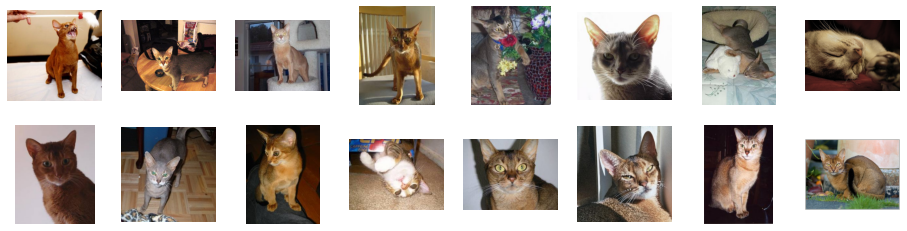

In [52]:
# show some input images (2 rows of 8 images)
fig = plt.figure(figsize = (16,4))
columns = 8
rows = 2
for i in range(1, columns*rows + 1):
    img = load_img(input_img_paths[i+100])
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.imshow(img)
plt.show()

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_22820\1547333248.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


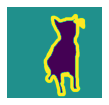

In [58]:
# show some target images (2 rows of 8 images)
fig = plt.figure(figsize = (16,4))
columns = 8
rows = 2
for i in range(1, columns*rows + 1):
    img = img_to_array(load_img(target_paths[i+100], color_mode="grayscale"))
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.imshow(img)
    break
plt.show()

In [73]:
# the figures have different sizes => make everything 200x200
img_size = (200,200)
num_imgs = len(input_img_paths)
batch_size = 32

# set some images aside for validation
num_val_samples = 100
train_input_imgs = input_img_paths[:-num_val_samples]
train_targets = target_paths [:-num_val_samples]
val_input_imgs = input_img_paths[-num_val_samples:]
val_targets = target_paths [-num_val_samples:]

# maak een Data Sequence Generator voor train en validatie data

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        
        start_index = idx * self.batch_size
        end_index = min(start_index + batch_size, len(self.x))
        size = end_index - start_index

        batch_x = np.zeros((size,) + img_size + (3,), dtype="float32")
        # batch size = 32 - > (32, 200, 200, 3)
        batch_y = np.zeros((size,) + img_size + (1,), dtype="uint8")

        for i in range(size):
            index = 0 
            batch_x[i] = load_img(target_paths[index], target_size=img_size)

            batch_y[i] = img_to_array(load_img(target_paths[index], target_size=img_size, color_mode="grayscale")).astype('uint8') - 1

        return batch_x, batch_y

train_gen = DataGenerator(train_input_imgs, train_targets, batch_size)
val_gen = DataGenerator(val_input_imgs, val_targets, batch_size)

In [74]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Resizing, Rescaling, Conv2D, MaxPool2D, Conv2DTranspose, UpSampling2D, BatchNormalization
# build and make model

inputs = Input(shape=(img_size) + (3, )) # (200, 200, 3)
x = Resizing(200, 200)(inputs)
x = Rescaling(1./255)(x)
x = Conv2D(16, 3, padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Conv2D(32, 3, padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Conv2D(64, 3, padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)

# aantal kernels moet hieronder niet hetzelfde zijn als hierboven
x = UpSampling2D()(x)
x = Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Conv2DTranspose(32, 3, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Conv2DTranspose(16, 3, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Resizing(200,200)(x)

outputs = Conv2D(3, 3, padding="same", activation="softmax")(x)
model = Model (inputs, outputs)

# print summary - how many parameters do you have?
model.summary()

# compile the model and pick an optimizer and loss function
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 resizing_11 (Resizing)      (None, 200, 200, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 batch_normalization_34 (Bat  (None, 200, 200, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                      

In [75]:
# add call back for saving best model


callbacks = [tf.keras.callbacks.ModelCheckpoint("model_best.keras", save_best_only=True)]

# train the model
history = model.fit(train_gen, epochs=4, callbacks=callbacks, validation_data=val_gen)

Epoch 1/4
228/228 [==============================] - 23s 93ms/step - loss: 0.0784 - val_loss: 1.2483
Epoch 2/4
228/228 [==============================] - 20s 86ms/step - loss: 0.0097 - val_loss: 2.4742
Epoch 3/4
228/228 [==============================] - 20s 87ms/step - loss: 0.0030 - val_loss: 0.5984
Epoch 4/4
228/228 [==============================] - 20s 87ms/step - loss: 0.0010 - val_loss: 0.0098


1/1 [==============================] - 0s 133ms/step
(1, 200, 200, 3)


C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_22820\876637339.py:19: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


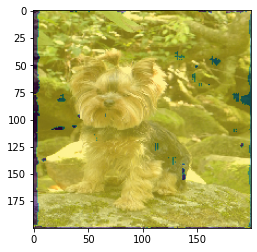

In [83]:
# load best model (saved by checkpoints) instead of model resulting from final fit
model = tf.keras.models.load_model("model_best.keras")

random_image = 16
test_image = load_img(val_input_imgs[random_image], target_size=img_size)
plt.imshow(test_image)

# display mask over the random target image
mask = model.predict(np.expand_dims(test_image, 0))
print(mask.shape)

def display_mask(pred):
    mask = np.argmax(pred, axis=-1)
    mask *= 127
    plt.imshow(mask[0], alpha=0.5)

display_mask(mask)

plt.show()